# ОБЩАЯ ИНФОРМАЦИЯ ОБО МНЕ
 - stepik id = 133973200
 - stepik name = Dmitry Kosenko
 - kaggle nick в таблице = Dmitry_Kosenko
 - roc-auc = 0.85185

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/deep_learning_school/part_1/homework_3/
!ls

Mounted at /content/drive
/content/drive/MyDrive/deep_learning_school/part_1/homework_3
baseline.ipynb	my_submission.csv  test.csv
catboost_info	submission.csv	   train.csv


<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [3]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
SEED = 1234
np.random.seed(SEED)

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
train = pd.read_csv('./train.csv', encoding='utf-8')
test = pd.read_csv("./test.csv", encoding='utf-8')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    # 'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    # 'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# YOUR CODE

In [8]:
train.sample(n=3, random_state=SEED)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
854,72,85.25,6083.1,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,0
5107,10,84.70,832.05,Female,0,No,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,1
593,11,73.85,926.25,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [9]:
def show_nans(dataset):
  print(f"Data len - {len(dataset)}")

  for col in num_cols:
    nan_rows = dataset[col][dataset[col].isna()]
    col_type = str(dataset[col].dtypes)
    print(f"{col} - {len(nan_rows)} - {col_type}")

  print('---')

  for col in cat_cols:
    nan_rows = dataset[col][dataset[col].isna()]
    col_type = str(dataset[col].dtypes)
    print(f"{col} - {len(nan_rows)} - {col_type}")

In [10]:
train['TotalSpent'] = train['TotalSpent'].apply(lambda item: item.strip())
train['TotalSpent'][train['TotalSpent'].astype(bool) == False] = 0.0
train['TotalSpent'] = train['TotalSpent'].astype(np.float64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
show_nans(train)

Data len - 5282
ClientPeriod - 0 - int64
MonthlySpending - 0 - float64
TotalSpent - 0 - float64
---
IsSeniorCitizen - 0 - int64
HasPartner - 0 - object
HasChild - 0 - object
HasMultiplePhoneNumbers - 0 - object
HasInternetService - 0 - object
HasOnlineSecurityService - 0 - object
HasOnlineBackup - 0 - object
HasDeviceProtection - 0 - object
HasTechSupportAccess - 0 - object
HasOnlineTV - 0 - object
HasMovieSubscription - 0 - object
HasContractPhone - 0 - object
IsBillingPaperless - 0 - object
PaymentMethod - 0 - object


In [12]:
test['TotalSpent'] = test['TotalSpent'].apply(lambda item: item.strip())
test['TotalSpent'][test['TotalSpent'].astype(bool) == False] = 0.0
test['TotalSpent'] = test['TotalSpent'].astype(np.float64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
show_nans(test)

Data len - 1761
ClientPeriod - 0 - int64
MonthlySpending - 0 - float64
TotalSpent - 0 - float64
---
IsSeniorCitizen - 0 - int64
HasPartner - 0 - object
HasChild - 0 - object
HasMultiplePhoneNumbers - 0 - object
HasInternetService - 0 - object
HasOnlineSecurityService - 0 - object
HasOnlineBackup - 0 - object
HasDeviceProtection - 0 - object
HasTechSupportAccess - 0 - object
HasOnlineTV - 0 - object
HasMovieSubscription - 0 - object
HasContractPhone - 0 - object
IsBillingPaperless - 0 - object
PaymentMethod - 0 - object


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
# YOUR CODE

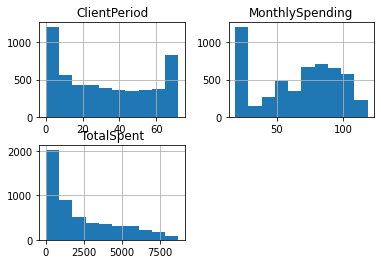

In [14]:
train.hist(column=num_cols)
None

In [15]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns

/usr/local/lib/python3.7/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [16]:
def show_plot(df, col):
  fig, ax = plt.subplots(1,1)
  sns.countplot(x=df[col], ax=ax)
  fig.show()

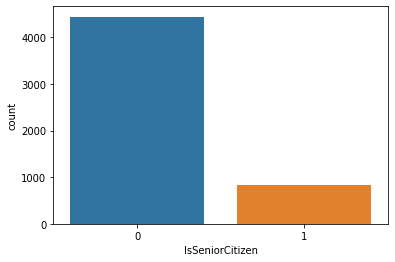

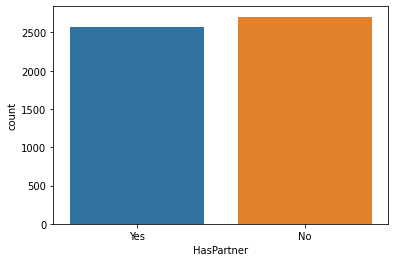

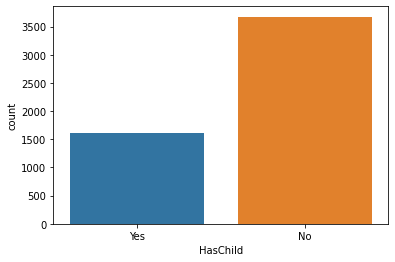

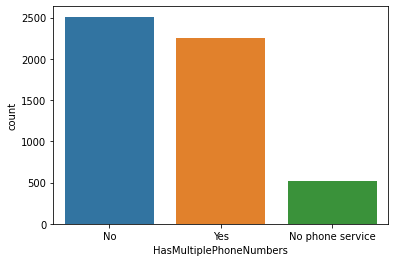

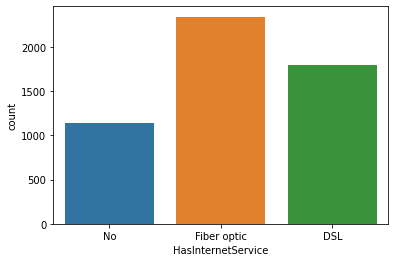

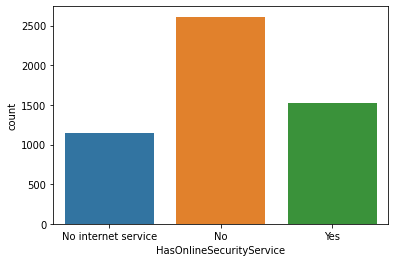

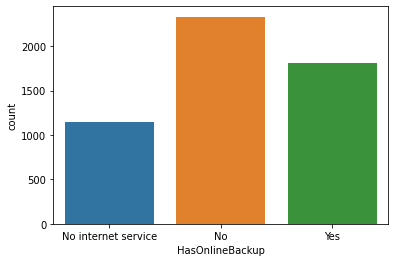

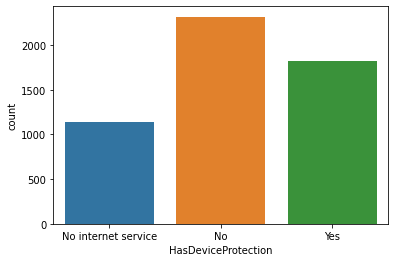

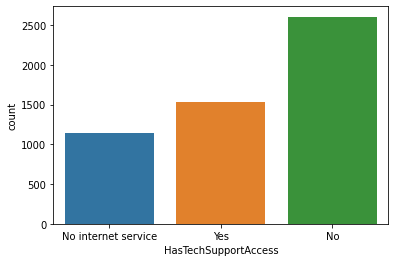

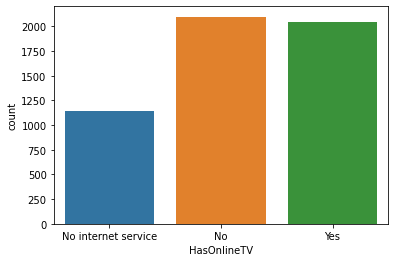

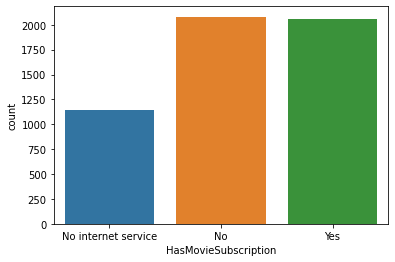

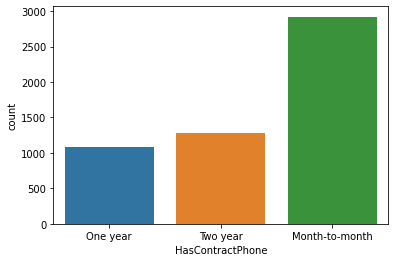

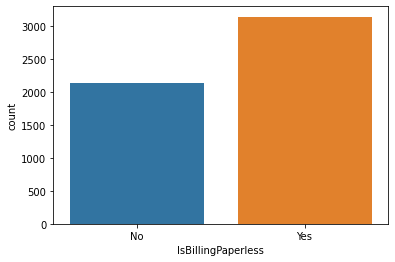

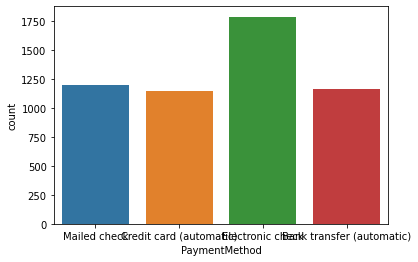

In [17]:
for col in cat_cols:
  show_plot(train, col)

### Классы во многом являются несбалансированными, это можно увидеть ниже. Отрицательных значений намного больше чем положительных

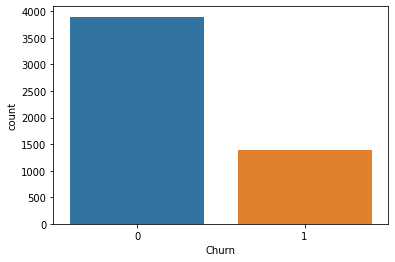

In [ ]:
show_plot(train, target_col)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# YOUR CODE

In [19]:
def yes_no_to_num(dataframe):
  # --------
  dataframe['HasPartner'][dataframe['HasPartner'] == 'No'] = 0.0
  dataframe['HasPartner'][dataframe['HasPartner'] == 'Yes'] = 1.0
  # --------
  dataframe['HasChild'][dataframe['HasChild'] == 'No'] = 0.0
  dataframe['HasChild'][dataframe['HasChild'] == 'Yes'] = 1.0
  # --------
  dataframe['IsBillingPaperless'][dataframe['IsBillingPaperless'] == 'No'] = 0.0
  dataframe['IsBillingPaperless'][dataframe['IsBillingPaperless'] == 'Yes'] = 1.0
  #####
  dataframe['HasPartner'] = dataframe['HasPartner'].astype(int)
  dataframe['HasChild'] = dataframe['HasChild'].astype(int)
  dataframe['IsBillingPaperless'] = dataframe['IsBillingPaperless'].astype(int)

  dataframe['TotalSpent'] = dataframe['TotalSpent'].apply(lambda item: item.strip())
  dataframe['TotalSpent'][dataframe['TotalSpent'].astype(bool) == False] = 0.0
  dataframe['TotalSpent'] = dataframe['TotalSpent'].astype(np.float64)

  # dataframe.drop(['Sex', 'HasPhoneService'], axis=1, inplace=True)


In [20]:
train = pd.read_csv('./train.csv')
create_data = lambda dat: (pd.concat([dat[num_cols], pd.get_dummies(dat[cat_cols])],axis=1), dat[target_col])
convert_data = lambda dat: pd.concat([dat[num_cols], pd.get_dummies(dat[cat_cols])],axis=1)
yes_no_to_num(train)
X, Y = create_data(train)
X.shape, Y.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

((5282, 38), (5282,))

In [21]:
pca = StandardScaler()
X = pca.fit_transform(X)
Y = Y.values

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=SEED)
# search params
param_grid = {
    'penalty' : ['l1', ],
    'C': [100, ],
    'solver': [ 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    "n_jobs": [-1],
}
# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

# запустим поиск
search.fit(X, Y)
None

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [23]:
# выведем наилучшие параметры
print(search.best_params_)
print(search.best_score_)

{'C': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}
0.8451695019796311


Выпишите какое лучшее качество и с какими параметрами вам удалось получить\
{'C': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear'}\
0.845143611922718

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

In [24]:
import xgboost
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# 0.8487068003469076

In [105]:
clf_boost = xgboost.XGBClassifier(random_state=SEED)
# search params
param_grid_boost = {
  'booster': ['gbtree',],
  'n_estimators': [ 98,],
  "learning_rate" : [0.1, ] ,
  "max_depth" : [2, 3],
  "min_child_weight" : [ 100,],
  "gamma" : [ 0.5, ],
  "colsample_bytree" : [ 0.5, ],
  'scale_pos_weight': [2, ],
  'reg_alpha': [ 0.1, ],
  'reg_lambda': [1.0,],
  'subsample': [0.9,]
}
# создадим объект GridSearchCV
search_boost = GridSearchCV(clf_boost, param_grid_boost, n_jobs=-1, cv=5, refit=True, scoring='roc_auc', )

# запустим поиск
search_boost.fit(X, Y)

# выведем наилучшие параметры
print(search_boost.best_params_)
print(search_boost.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 100, 'n_estimators': 98, 'reg_alpha': 0.1, 'reg_lambda': 0.9, 'scale_pos_weight': 2, 'subsample': 0.9}
0.8487094077179567


Выпишите какое лучшее качество и с какими параметрами вам удалось получить\
{'booster': 'gbtree', 'colsample_bytree': 0.5, 'gamma': 0.5, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 100, 'n_estimators': 98, 'reg_alpha': 0.1, 'scale_pos_weight': 2}\
0.8487068003469076

XGBClassifier

# Предсказания

In [26]:
best_model = xgboost.XGBClassifier(random_state=SEED,
                                   booster='gbtree', 
                                   colsample_bytree= 0.5, 
                                   gamma= 0.5, 
                                   learning_rate= 0.1, 
                                   max_depth= 2, 
                                   min_child_weight= 100, 
                                   n_estimators= 98, 
                                   reg_alpha= 0.1, 
                                   scale_pos_weight= 2, 
                        
                                   )

best_model.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=100, missing=None, n_estimators=98, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
test = pd.read_csv("./test.csv")

In [28]:
X_test = pd.read_csv('./test.csv')
yes_no_to_num(X_test)
X_test = convert_data(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [29]:

submission = pd.read_csv('./submission.csv')

X_test = pca.transform(X_test)

In [30]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
# submission['Churn'] = cbc_best.predict(test)
submission.to_csv('./my_submission.csv', index=False)

In [31]:
pd.read_csv('./my_submission.csv')

,Id,Churn
0,0,0.103170
1,1,0.794015
2,2,0.806770
3,3,0.026034
4,4,0.016876
...,...,...
1756,1756,0.235746
1757,1757,0.031192
1758,1758,0.871039
1759,1759,0.725348


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.